# Breast Cancer Diagnostic Classifier

## 1) Baground 
The dataset , Wisconsin Diagnostic Breast Cancer (WDBC) downloaded from Kaggle (https://www.kaggle.com/datasets/mohaiminul101/wisconsin-diagnostic-breast-cancer-wdbc), contains information related to medical observations of cell characteristics, primarily used for the diagnosis of breast cancer. The dataset includes a variety of numerical measurements extracted from cell images. These measurements pertain to various attributes such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. Each observation in the dataset represents a cell, and the primary goal is to classify cells into two categories: 'Malignant' (indicating cancerous cells) and 'Benign' (indicating non-cancerous cells).

The dataset's columns include an 'ID' for each observation, a 'Diagnosis' column indicating the diagnosis result ('M' for malignant, 'B' for benign), and several feature columns containing the measured attributes mentioned earlier.

## 2) Explororary Data Examination

### a- Importing necessary packages 

In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for data visualization

### b- Importing the data

In [2]:
df = pd.read_csv('wdbc.data.csv')

### c- Initial exploration
  - using .head() to explor the columns titles and the first 5 rows
  - using .info() to get more info about the categories of each feature 


In [3]:
df.head()

842302  M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  0.2654  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
1  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
2  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
3  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   
4  0.08089  ...  15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355  0.1741   

   0.4601   0.1189  
0  0.2750  0.08902  
1  0.3613  0.08758  
2  0.6638  0.17300  
3  0.2364  0.07678  
4  0.3985  0.12440  

[5 rows x 32 columns]

##### There were no titles, instead the first row is displaued as the titles 


In [4]:
# Creating a tuple that includes all the column titles
df_colomns= ('ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 
             'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave points1', 'symmetry1', 
             'fractal_dimension1', 'radius2', 'texture2', 'perimeter2','area2', 'smoothness2', 'compactness2', 'concavity2',
             'concave points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3',
             'compactness3', 'concavity3', 'concave points3', 'symmetry3', 'fractal_dimension3')

In [5]:
# Adding the column titles to the dataset
df.columns=df_colomns

In [6]:
# Checking if the column titles were added properly
df.head()

ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842517         M    20.57     17.77      132.90  1326.0      0.08474   
1  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
2  84348301         M    11.42     20.38       77.58   386.1      0.14250   
3  84358402         M    20.29     14.34      135.10  1297.0      0.10030   
4    843786         M    12.45     15.70       82.57   477.1      0.12780   

   compactness1  concavity1  concave points1  ...  radius3  texture3  \
0       0.07864      0.0869          0.07017  ...    24.99     23.41   
1       0.15990      0.1974          0.12790  ...    23.57     25.53   
2       0.28390      0.2414          0.10520  ...    14.91     26.50   
3       0.13280      0.1980          0.10430  ...    22.54     16.67   
4       0.17000      0.1578          0.08089  ...    15.47     23.75   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave points3  \
0      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
1      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
2       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
3      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   
4      103.40   741.6       0.1791        0.5249      0.5355           0.1741   

   symmetry3  fractal_dimension3  
0     0.2750             0.08902  
1     0.3613             0.08758  
2     0.6638             0.17300  
3     0.2364             0.07678  
4     0.3985             0.12440  

[5 rows x 32 columns]

In [7]:
# Exploring the shape of the dataset
df.shape

(568, 32)

##### The dataset contains 32 columuns and 568 observation

In [8]:
# The first column contains the ID of the observation, 
# which is not relevant information for dataset analysis or potential model training
df = df.drop('ID', axis=1)

##### Acoording to the dataset description, the instances when a 0 was entered, are related to missing data and should considered as N/A

In [9]:
# Replacing 0 values with NA (null values)
df.replace(0, pd.NA, inplace=True)

In [10]:
# Checking for missing values in the dataset
df.isna().sum()

Diagnosis              0
radius1                0
texture1               0
perimeter1             0
area1                  0
smoothness1            0
compactness1           0
concavity1            13
concave points1       13
symmetry1              0
fractal_dimension1     0
radius2                0
texture2               0
perimeter2             0
area2                  0
smoothness2            0
compactness2           0
concavity2            13
concave points2       13
symmetry2              0
fractal_dimension2     0
radius3                0
texture3               0
perimeter3             0
area3                  0
smoothness3            0
compactness3           0
concavity3            13
concave points3       13
symmetry3              0
fractal_dimension3     0
dtype: int64

### d) Cleaning the dataset

In [11]:
# The cleaning strategy is to drop rows with missing values if they constitute 5% or less of the total values
treshold = len(df) * 0.05
cols_to_drop = df.columns[df.isna().sum() <= treshold]
print(cols_to_drop)
df.dropna(subset=cols_to_drop, inplace=True)

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


In [12]:
# Checking for missing values in the dataset
df.isna().sum()

Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [13]:
# Getting more information about the data and exploring the categories of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 566
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           555 non-null    object 
 1   radius1             555 non-null    float64
 2   texture1            555 non-null    float64
 3   perimeter1          555 non-null    float64
 4   area1               555 non-null    float64
 5   smoothness1         555 non-null    float64
 6   compactness1        555 non-null    float64
 7   concavity1          555 non-null    object 
 8   concave points1     555 non-null    object 
 9   symmetry1           555 non-null    float64
 10  fractal_dimension1  555 non-null    float64
 11  radius2             555 non-null    float64
 12  texture2            555 non-null    float64
 13  perimeter2          555 non-null    float64
 14  area2               555 non-null    float64
 15  smoothness2         555 non-null    float64
 16  compactness2 


##### there are 7 features listed as objects and the rest 24 features as floats. let's explore the Dignosis (The outcome)


In [14]:
# Counting the categories in the 'Diagnosis' column
df['Diagnosis'].value_counts()

Diagnosis
B    344
M    211
Name: count, dtype: int64

##### As expected there are 2 categories B for benaign tumor and M for malaign, to further explore and analyse the data, and to run potential ML model. Those categories should be changed to 0 and 1 instead and should be considered as integers

In [15]:
# Replacing 'M' (malignant) with 1 and 'B' (benign) with 0 in the 'Diagnosis' column
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [16]:
# Checking the distribution of categories after mapping
df['Diagnosis'].value_counts()

Diagnosis
0    344
1    211
Name: count, dtype: int64

##### concavity 1,2, and 3, and concave points 1,2, and 3 are listed as objects. However, there are measures that shouol be considered as floats

In [17]:
# Changing the data type of specific columns from category to float: concavity and concave points measurements
df[['concavity1', 'concavity2', 'concavity3', 'concave points1', 
    'concave points2', 'concave points3']] = df[['concavity1', 'concavity2', 'concavity3', 
                                                 'concave points1', 'concave points2', 'concave points3']].astype(float)

In [18]:
# Verifying if all columns are now of float data type and integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 566
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           555 non-null    int64  
 1   radius1             555 non-null    float64
 2   texture1            555 non-null    float64
 3   perimeter1          555 non-null    float64
 4   area1               555 non-null    float64
 5   smoothness1         555 non-null    float64
 6   compactness1        555 non-null    float64
 7   concavity1          555 non-null    float64
 8   concave points1     555 non-null    float64
 9   symmetry1           555 non-null    float64
 10  fractal_dimension1  555 non-null    float64
 11  radius2             555 non-null    float64
 12  texture2            555 non-null    float64
 13  perimeter2          555 non-null    float64
 14  area2               555 non-null    float64
 15  smoothness2         555 non-null    float64
 16  compactness2 

##### At this stage we are going to identify potetial correlations that could exist between different features and beetween feautures and the outcome 

In [19]:
# computing the correlation betwee different columns
corrolation = df.corr()
# Since there are 31 columns, we'll split the correlation table into 3 parts
corr1=corrolation.iloc[:,0:11]
corr2=corrolation.iloc[:,11:21]
corr3=corrolation.iloc[:,21:31]

##### we are going to focus on the correlation that high (more than 0.8 or less that -0.8)


In [20]:
# Extracting highly correlated features (correlation > 0.8 or correlation < -0.8) from corr1
corr1[(corr1 > 0.8) | (corr1 < -0.8)]

Diagnosis   radius1  texture1  perimeter1     area1  \
Diagnosis                 1.0       NaN       NaN         NaN       NaN   
radius1                   NaN  1.000000       NaN    0.997786  0.988074   
texture1                  NaN       NaN  1.000000         NaN       NaN   
perimeter1                NaN  0.997786       NaN    1.000000  0.987236   
area1                     NaN  0.988074       NaN    0.987236  1.000000   
smoothness1               NaN       NaN       NaN         NaN       NaN   
compactness1              NaN       NaN       NaN         NaN       NaN   
concavity1                NaN       NaN       NaN         NaN       NaN   
concave points1           NaN  0.817654       NaN    0.846792  0.819465   
symmetry1                 NaN       NaN       NaN         NaN       NaN   
fractal_dimension1        NaN       NaN       NaN         NaN       NaN   
radius2                   NaN       NaN       NaN         NaN       NaN   
texture2                  NaN       NaN       NaN         NaN       NaN   
perimeter2                NaN       NaN       NaN         NaN       NaN   
area2                     NaN       NaN       NaN         NaN  0.802953   
smoothness2               NaN       NaN       NaN         NaN       NaN   
compactness2              NaN       NaN       NaN         NaN       NaN   
concavity2                NaN       NaN       NaN         NaN       NaN   
concave points2           NaN       NaN       NaN         NaN       NaN   
symmetry2                 NaN       NaN       NaN         NaN       NaN   
fractal_dimension2        NaN       NaN       NaN         NaN       NaN   
radius3                   NaN  0.969109       NaN    0.968769  0.962437   
texture3                  NaN       NaN  0.910403         NaN       NaN   
perimeter3                NaN  0.965199       NaN    0.970279  0.959516   
area3                     NaN  0.942036       NaN    0.942202  0.959166   
smoothness3               NaN       NaN       NaN         NaN       NaN   
compactness3              NaN       NaN       NaN         NaN       NaN   
concavity3                NaN       NaN       NaN         NaN       NaN   
concave points3           NaN       NaN       NaN         NaN       NaN   
symmetry3                 NaN       NaN       NaN         NaN       NaN   
fractal_dimension3        NaN       NaN       NaN         NaN       NaN   

                    smoothness1  compactness1  concavity1  concave points1  \
Diagnosis                   NaN           NaN         NaN              NaN   
radius1                     NaN           NaN         NaN         0.817654   
texture1                    NaN           NaN         NaN              NaN   
perimeter1                  NaN           NaN         NaN         0.846792   
area1                       NaN           NaN         NaN         0.819465   
smoothness1                 1.0           NaN         NaN              NaN   
compactness1                NaN      1.000000    0.878937         0.824408   
concavity1                  NaN      0.878937    1.000000         0.917995   
concave points1             NaN      0.824408    0.917995         1.000000   
symmetry1                   NaN           NaN         NaN              NaN   
fractal_dimension1          NaN           NaN         NaN              NaN   
radius2                     NaN           NaN         NaN              NaN   
texture2                    NaN           NaN         NaN              NaN   
perimeter2                  NaN           NaN         NaN              NaN   
area2                       NaN           NaN         NaN              NaN   
smoothness2                 NaN           NaN         NaN              NaN   
compactness2                NaN           NaN         NaN              NaN   
concavity2                  NaN           NaN         NaN              NaN   
concave points2             NaN           NaN         NaN              NaN   
symmetry2                   NaN           NaN         NaN  

In [21]:
corr2[(corr2>0.8) | (corr2 <-0.8)]

radius2  texture2  perimeter2     area2  smoothness2  \
Diagnosis                NaN       NaN         NaN       NaN          NaN   
radius1                  NaN       NaN         NaN       NaN          NaN   
texture1                 NaN       NaN         NaN       NaN          NaN   
perimeter1               NaN       NaN         NaN       NaN          NaN   
area1                    NaN       NaN         NaN  0.802953          NaN   
smoothness1              NaN       NaN         NaN       NaN          NaN   
compactness1             NaN       NaN         NaN       NaN          NaN   
concavity1               NaN       NaN         NaN       NaN          NaN   
concave points1          NaN       NaN         NaN       NaN          NaN   
symmetry1                NaN       NaN         NaN       NaN          NaN   
fractal_dimension1       NaN       NaN         NaN       NaN          NaN   
radius2             1.000000       NaN    0.972580  0.952419          NaN   
texture2                 NaN       1.0         NaN       NaN          NaN   
perimeter2          0.972580       NaN    1.000000  0.937428          NaN   
area2               0.952419       NaN    0.937428  1.000000          NaN   
smoothness2              NaN       NaN         NaN       NaN          1.0   
compactness2             NaN       NaN         NaN       NaN          NaN   
concavity2               NaN       NaN         NaN       NaN          NaN   
concave points2          NaN       NaN         NaN       NaN          NaN   
symmetry2                NaN       NaN         NaN       NaN          NaN   
fractal_dimension2       NaN       NaN         NaN       NaN          NaN   
radius3                  NaN       NaN         NaN       NaN          NaN   
texture3                 NaN       NaN         NaN       NaN          NaN   
perimeter3               NaN       NaN         NaN       NaN          NaN   
area3                    NaN       NaN         NaN  0.810912          NaN   
smoothness3              NaN       NaN         NaN       NaN          NaN   
compactness3             NaN       NaN         NaN       NaN          NaN   
concavity3               NaN       NaN         NaN       NaN          NaN   
concave points3          NaN       NaN         NaN       NaN          NaN   
symmetry3                NaN       NaN         NaN       NaN          NaN   
fractal_dimension3       NaN       NaN         NaN       NaN          NaN   

                    compactness2  concavity2  concave points2  symmetry2  \
Diagnosis                    NaN         NaN              NaN        NaN   
radius1                      NaN         NaN              NaN        NaN   
texture1                     NaN         NaN              NaN        NaN   
perimeter1                   NaN         NaN              NaN        NaN   
area1                        NaN         NaN              NaN        NaN   
smoothness1                  NaN         NaN              NaN        NaN   
compactness1                 NaN         NaN              NaN        NaN   
concavity1                   NaN         NaN              NaN        NaN   
concave points1              NaN         NaN              NaN        NaN   
symmetry1                    NaN         NaN              NaN        NaN   
fractal_dimension1           NaN         NaN              NaN        NaN   
radius2                      NaN         NaN              NaN        NaN   
texture2                     NaN         NaN              NaN        NaN   
perimeter2                   NaN         NaN              NaN        NaN   
area2                        NaN         NaN              NaN        NaN   
smoothness2                  NaN         NaN              NaN        NaN   
compactness2            1.000000         NaN              NaN        NaN   
concavity2                   NaN         1.0              NaN        NaN   
concave points2              NaN         NaN              1.0        NaN   
symmetry2                    NaN    

In [22]:
corr3[(corr3>0.8) | (corr3 <-0.8)]

radius3  texture3  perimeter3     area3  smoothness3  \
Diagnosis                NaN       NaN         NaN       NaN          NaN   
radius1             0.969109       NaN    0.965199  0.942036          NaN   
texture1                 NaN  0.910403         NaN       NaN          NaN   
perimeter1          0.968769       NaN    0.970279  0.942202          NaN   
area1               0.962437       NaN    0.959516  0.959166          NaN   
smoothness1              NaN       NaN         NaN       NaN          NaN   
compactness1             NaN       NaN         NaN       NaN          NaN   
concavity1               NaN       NaN         NaN       NaN          NaN   
concave points1     0.823642       NaN    0.849631  0.803661          NaN   
symmetry1                NaN       NaN         NaN       NaN          NaN   
fractal_dimension1       NaN       NaN         NaN       NaN          NaN   
radius2                  NaN       NaN         NaN       NaN          NaN   
texture2                 NaN       NaN         NaN       NaN          NaN   
perimeter2               NaN       NaN         NaN       NaN          NaN   
area2                    NaN       NaN         NaN  0.810912          NaN   
smoothness2              NaN       NaN         NaN       NaN          NaN   
compactness2             NaN       NaN         NaN       NaN          NaN   
concavity2               NaN       NaN         NaN       NaN          NaN   
concave points2          NaN       NaN         NaN       NaN          NaN   
symmetry2                NaN       NaN         NaN       NaN          NaN   
fractal_dimension2       NaN       NaN         NaN       NaN          NaN   
radius3             1.000000       NaN    0.993587  0.984480          NaN   
texture3                 NaN  1.000000         NaN       NaN          NaN   
perimeter3          0.993587       NaN    1.000000  0.977929          NaN   
area3               0.984480       NaN    0.977929  1.000000          NaN   
smoothness3              NaN       NaN         NaN       NaN          1.0   
compactness3             NaN       NaN         NaN       NaN          NaN   
concavity3               NaN       NaN         NaN       NaN          NaN   
concave points3          NaN       NaN    0.807898       NaN          NaN   
symmetry3                NaN       NaN         NaN       NaN          NaN   
fractal_dimension3       NaN       NaN         NaN       NaN          NaN   

                    compactness3  concavity3  concave points3  symmetry3  \
Diagnosis                    NaN         NaN              NaN        NaN   
radius1                      NaN         NaN              NaN        NaN   
texture1                     NaN         NaN              NaN        NaN   
perimeter1                   NaN         NaN              NaN        NaN   
area1                        NaN         NaN              NaN        NaN   
smoothness1                  NaN         NaN              NaN        NaN   
compactness1            0.860056    0.809850         0.810379        NaN   
concavity1                   NaN    0.879452         0.857620        NaN   
concave points1              NaN         NaN         0.907098        NaN   
symmetry1                    NaN         NaN              NaN        NaN   
fractal_dimension1           NaN         NaN              NaN        NaN   
radius2                      NaN         NaN              NaN        NaN   
texture2                     NaN         NaN              NaN        NaN   
perimeter2                   NaN         NaN              NaN        NaN   
area2                        NaN         NaN              NaN        NaN   
smoothness2                  NaN         NaN              NaN        NaN   
compactness2                 NaN         NaN              NaN        NaN   
concavity2                   NaN         NaN              NaN        NaN   
concave points2              NaN         NaN              NaN        NaN   
symmetry2                    NaN    

##### The correlation matrices reveal that certain features display high correlations with the ones we have chosen to retain. To prevent potential model overfitting, the following features are identified for removal:

##### 'perimeter1', 'area1', 'concave points1', 'radius3', 'area3', 'texture3', 'smoothness3', 'concavity1', 'compactness3', 'concavity3', 'concave points3', 'perimeter2', 'perimeter3', 'area2', 'concavity2', 'fractal_dimension2'

In [23]:
# Identifying highly correlated features to drop based on correlation matrices
# These features are highly correlated with the ones we have chosen to retain, aiming to prevent overfitting of potential models
columns_to_drop = ['perimeter1', 'area1', 'concave points1', 'radius3', 'area3', 'texture3', 'smoothness3', 'concavity1', 'compactness3', 'concavity3',
                   'concave points3', 'perimeter2', 'perimeter3', 'area2', 'concavity2', 'fractal_dimension2']

# Creating a new DataFrame by dropping the identified columns
df_new = df.drop(columns_to_drop, axis=1)

In [24]:
# Calculating correlation matrix for the new DataFrame after dropping highly correlated features
corr_new=df_new.corr()
# Extracting highly correlated features (correlation > 0.8 or correlation < -0.8) from corr_new
corr_new[(corr_new>0.8) | (corr_new <-0.8)]

Diagnosis  radius1  texture1  smoothness1  compactness1  \
Diagnosis                 1.0      NaN       NaN          NaN           NaN   
radius1                   NaN      1.0       NaN          NaN           NaN   
texture1                  NaN      NaN       1.0          NaN           NaN   
smoothness1               NaN      NaN       NaN          1.0           NaN   
compactness1              NaN      NaN       NaN          NaN           1.0   
symmetry1                 NaN      NaN       NaN          NaN           NaN   
fractal_dimension1        NaN      NaN       NaN          NaN           NaN   
radius2                   NaN      NaN       NaN          NaN           NaN   
texture2                  NaN      NaN       NaN          NaN           NaN   
smoothness2               NaN      NaN       NaN          NaN           NaN   
compactness2              NaN      NaN       NaN          NaN           NaN   
concave points2           NaN      NaN       NaN          NaN           NaN   
symmetry2                 NaN      NaN       NaN          NaN           NaN   
symmetry3                 NaN      NaN       NaN          NaN           NaN   
fractal_dimension3        NaN      NaN       NaN          NaN           NaN   

                    symmetry1  fractal_dimension1  radius2  texture2  \
Diagnosis                 NaN                 NaN      NaN       NaN   
radius1                   NaN                 NaN      NaN       NaN   
texture1                  NaN                 NaN      NaN       NaN   
smoothness1               NaN                 NaN      NaN       NaN   
compactness1              NaN                 NaN      NaN       NaN   
symmetry1                 1.0                 NaN      NaN       NaN   
fractal_dimension1        NaN                 1.0      NaN       NaN   
radius2                   NaN                 NaN      1.0       NaN   
texture2                  NaN                 NaN      NaN       1.0   
smoothness2               NaN                 NaN      NaN       NaN   
compactness2              NaN                 NaN      NaN       NaN   
concave points2           NaN                 NaN      NaN       NaN   
symmetry2                 NaN                 NaN      NaN       NaN   
symmetry3                 NaN                 NaN      NaN       NaN   
fractal_dimension3        NaN                 NaN      NaN       NaN   

                    smoothness2  compactness2  concave points2  symmetry2  \
Diagnosis                   NaN           NaN              NaN        NaN   
radius1                     NaN           NaN              NaN        NaN   
texture1                    NaN           NaN              NaN        NaN   
smoothness1                 NaN           NaN              NaN        NaN   
compactness1                NaN           NaN              NaN        NaN   
symmetry1                   NaN           NaN              NaN        NaN   
fractal_dimension1          NaN           NaN              NaN        NaN   
radius2                     NaN           NaN              NaN        NaN   
texture2                    NaN           NaN              NaN        NaN   
smoothness2                 1.0           NaN              NaN        NaN   
compactness2                NaN           1.0              NaN        NaN   
concave points2             NaN           NaN              1.0        NaN   
symmetry2                   NaN           NaN              NaN        1.0   
symmetry3                   NaN           NaN              NaN        NaN   
fractal_dimension3          NaN           NaN              NaN        NaN   

                    symmetry3  fractal_dimension3  
Diagnosis                 NaN                 NaN  
radius1                   NaN                 NaN  
texture1                  NaN                 NaN  
smoothness1               NaN                 NaN  
compactness1              NaN                 NaN  
symmetry1                 NaN                 NaN  
fract

In [25]:
# Getting the dimensions (number of rows and columns) of the modified DataFrame df_new
df_new.shape

(555, 15)

The new dataset contain 555 observation and 14 features 

In [26]:
# Displaying the first few rows of the modified DataFrame 
df_new.head()

Diagnosis  radius1  texture1  smoothness1  compactness1  symmetry1  \
0          1    20.57     17.77      0.08474       0.07864     0.1812   
1          1    19.69     21.25      0.10960       0.15990     0.2069   
2          1    11.42     20.38      0.14250       0.28390     0.2597   
3          1    20.29     14.34      0.10030       0.13280     0.1809   
4          1    12.45     15.70      0.12780       0.17000     0.2087   

   fractal_dimension1  radius2  texture2  smoothness2  compactness2  \
0             0.05667   0.5435    0.7339     0.005225       0.01308   
1             0.05999   0.7456    0.7869     0.006150       0.04006   
2             0.09744   0.4956    1.1560     0.009110       0.07458   
3             0.05883   0.7572    0.7813     0.011490       0.02461   
4             0.07613   0.3345    0.8902     0.007510       0.03345   

   concave points2  symmetry2  symmetry3  fractal_dimension3  
0          0.01340    0.01389     0.2750             0.08902  
1          0.02058    0.02250     0.3613             0.08758  
2          0.01867    0.05963     0.6638             0.17300  
3          0.01885    0.01756     0.2364             0.07678  
4          0.01137    0.02165     0.3985             0.12440

In [27]:
# Generating descriptive statistics for the modified DataFrame df_new
df_new.describe()

Diagnosis     radius1    texture1  smoothness1  compactness1  \
count  555.000000  555.000000  555.000000   555.000000    555.000000   
mean     0.380180   14.230804   19.275748     0.096577      0.105369   
std      0.485869    3.481656    4.234019     0.013877      0.052180   
min      0.000000    7.691000    9.710000     0.062510      0.019380   
25%      0.000000   11.760000   16.195000     0.086650      0.066525   
50%      0.000000   13.450000   18.870000     0.095970      0.095090   
75%      1.000000   16.025000   21.750000     0.105350      0.130550   
max      1.000000   28.110000   39.280000     0.163400      0.345400   

        symmetry1  fractal_dimension1     radius2    texture2  smoothness2  \
count  555.000000          555.000000  555.000000  555.000000   555.000000   
mean     0.181169            0.062718    0.405206    1.193447     0.006976   
std      0.027349            0.007033    0.278707    0.499832     0.002927   
min      0.116700            0.049960    0.111500    0.360200     0.002667   
25%      0.161900            0.057670    0.232350    0.830500     0.005115   
50%      0.179200            0.061490    0.319800    1.093000     0.006298   
75%      0.195700            0.066070    0.480700    1.465500     0.008077   
max      0.304000            0.097440    2.873000    3.568000     0.031130   

       compactness2  concave points2   symmetry2   symmetry3  \
count    555.000000       555.000000  555.000000  555.000000   
mean       0.025800         0.012065    0.020296    0.290497   
std        0.017936         0.005972    0.008069    0.061664   
min        0.002252         0.001852    0.007882    0.156500   
25%        0.013675         0.007993    0.015005    0.250800   
50%        0.020730         0.011100    0.018680    0.282300   
75%        0.032535         0.014865    0.022925    0.318700   
max        0.135400         0.052790    0.078950    0.663800   

       fractal_dimension3  
count          555.000000  
mean             0.084078  
std              0.018086  
min              0.055040  
25%              0.071865  
50%              0.080060  
75%              0.092085  
max              0.207500

In [28]:
# Counting the normalized distribution of categories in the 'Diagnosis' column of df_new
df_new['Diagnosis'].value_counts(normalize=True)

Diagnosis
0    0.61982
1    0.38018
Name: proportion, dtype: float64

### e- Visualizing the dataset

##### Create a grid of bar plots, each showing the relationship between the 'Diagnosis' category and different selected features. It visually compares how the chosen features differ for different diagnoses (Malignant and Benign) using bar plots.

In [29]:
# Select the columns you want to plot (excluding the 'Diagnosis' column)
columns_to_plot = df_new.columns.drop('Diagnosis')

# Create subplots with 5 plots in 5 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

# Flatten the axes array to iterate through the subplots
axes = axes.flatten()

# Loop through each column and create a bar plot for each
for i, col in enumerate(columns_to_plot):
    sns.barplot(x='Diagnosis', y=col, data=df_new, ax=axes[i])
    axes[i].set_title(f'Bar plot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Diagnosis')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##### The above plots indicate that the mean values of various features tend to be higher for the 'Malignant' diagnosis category. This observation suggests potential differences in feature distributions between 'Malignant' and 'Benign' diagnoses, which could contribute to distinguishing between the two categories.

##### the below set of scatter plots visualizes the relationship between selected features and the 'Diagnosis' category in a dataset. Scatter plots are particularly useful in classification cases to help understand how the distribution of feature values varies across different classes.

In [31]:
# Select the columns you want to plot (excluding the 'Diagnosis' column)
columns_to_plot = df_new.columns.drop('Diagnosis')

# Create subplots with 5 plots in 5 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

# Flatten the axes array to iterate through the subplots
axes = axes.flatten()

# Loop through each column and create a bar plot for each
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=col,y='Diagnosis',  data=df_new, ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Diagnosis')
    # Add a vertical line at x = 0.5 (representing the middle of the x-axis)
    #axes[i].axvline(x=(df[col].max())/2, color='black', linewidth=0.5, linestyle='--')

    # Modify the x-axis tick labels to display as percentages
    #axes[i].set_xticklabels(['{:,.0%}'.format(x) for x in axes[i].get_xticks()])   
   
# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##### The resulting set of scatter plots reveals that a clear separation between the two diagnosis categories (1 and 2) is not evident. This absence of distinct separation suggests challenges in effectively distinguishing between the 'Malignant' (1) and 'Benign' (2) diagnoses solely based on the plotted feature values.

##### generates a pairplot that visualizes the relationships between different pairs of features in the dataset df_new. The color-coding by 'Diagnosis' category enhances the pairplot, helping to identify feature patterns that might distinguish between 'Malignant' and 'Benign' diagnoses. This graphical representation aids in exploring potential relationships and identifying informative features for classification. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


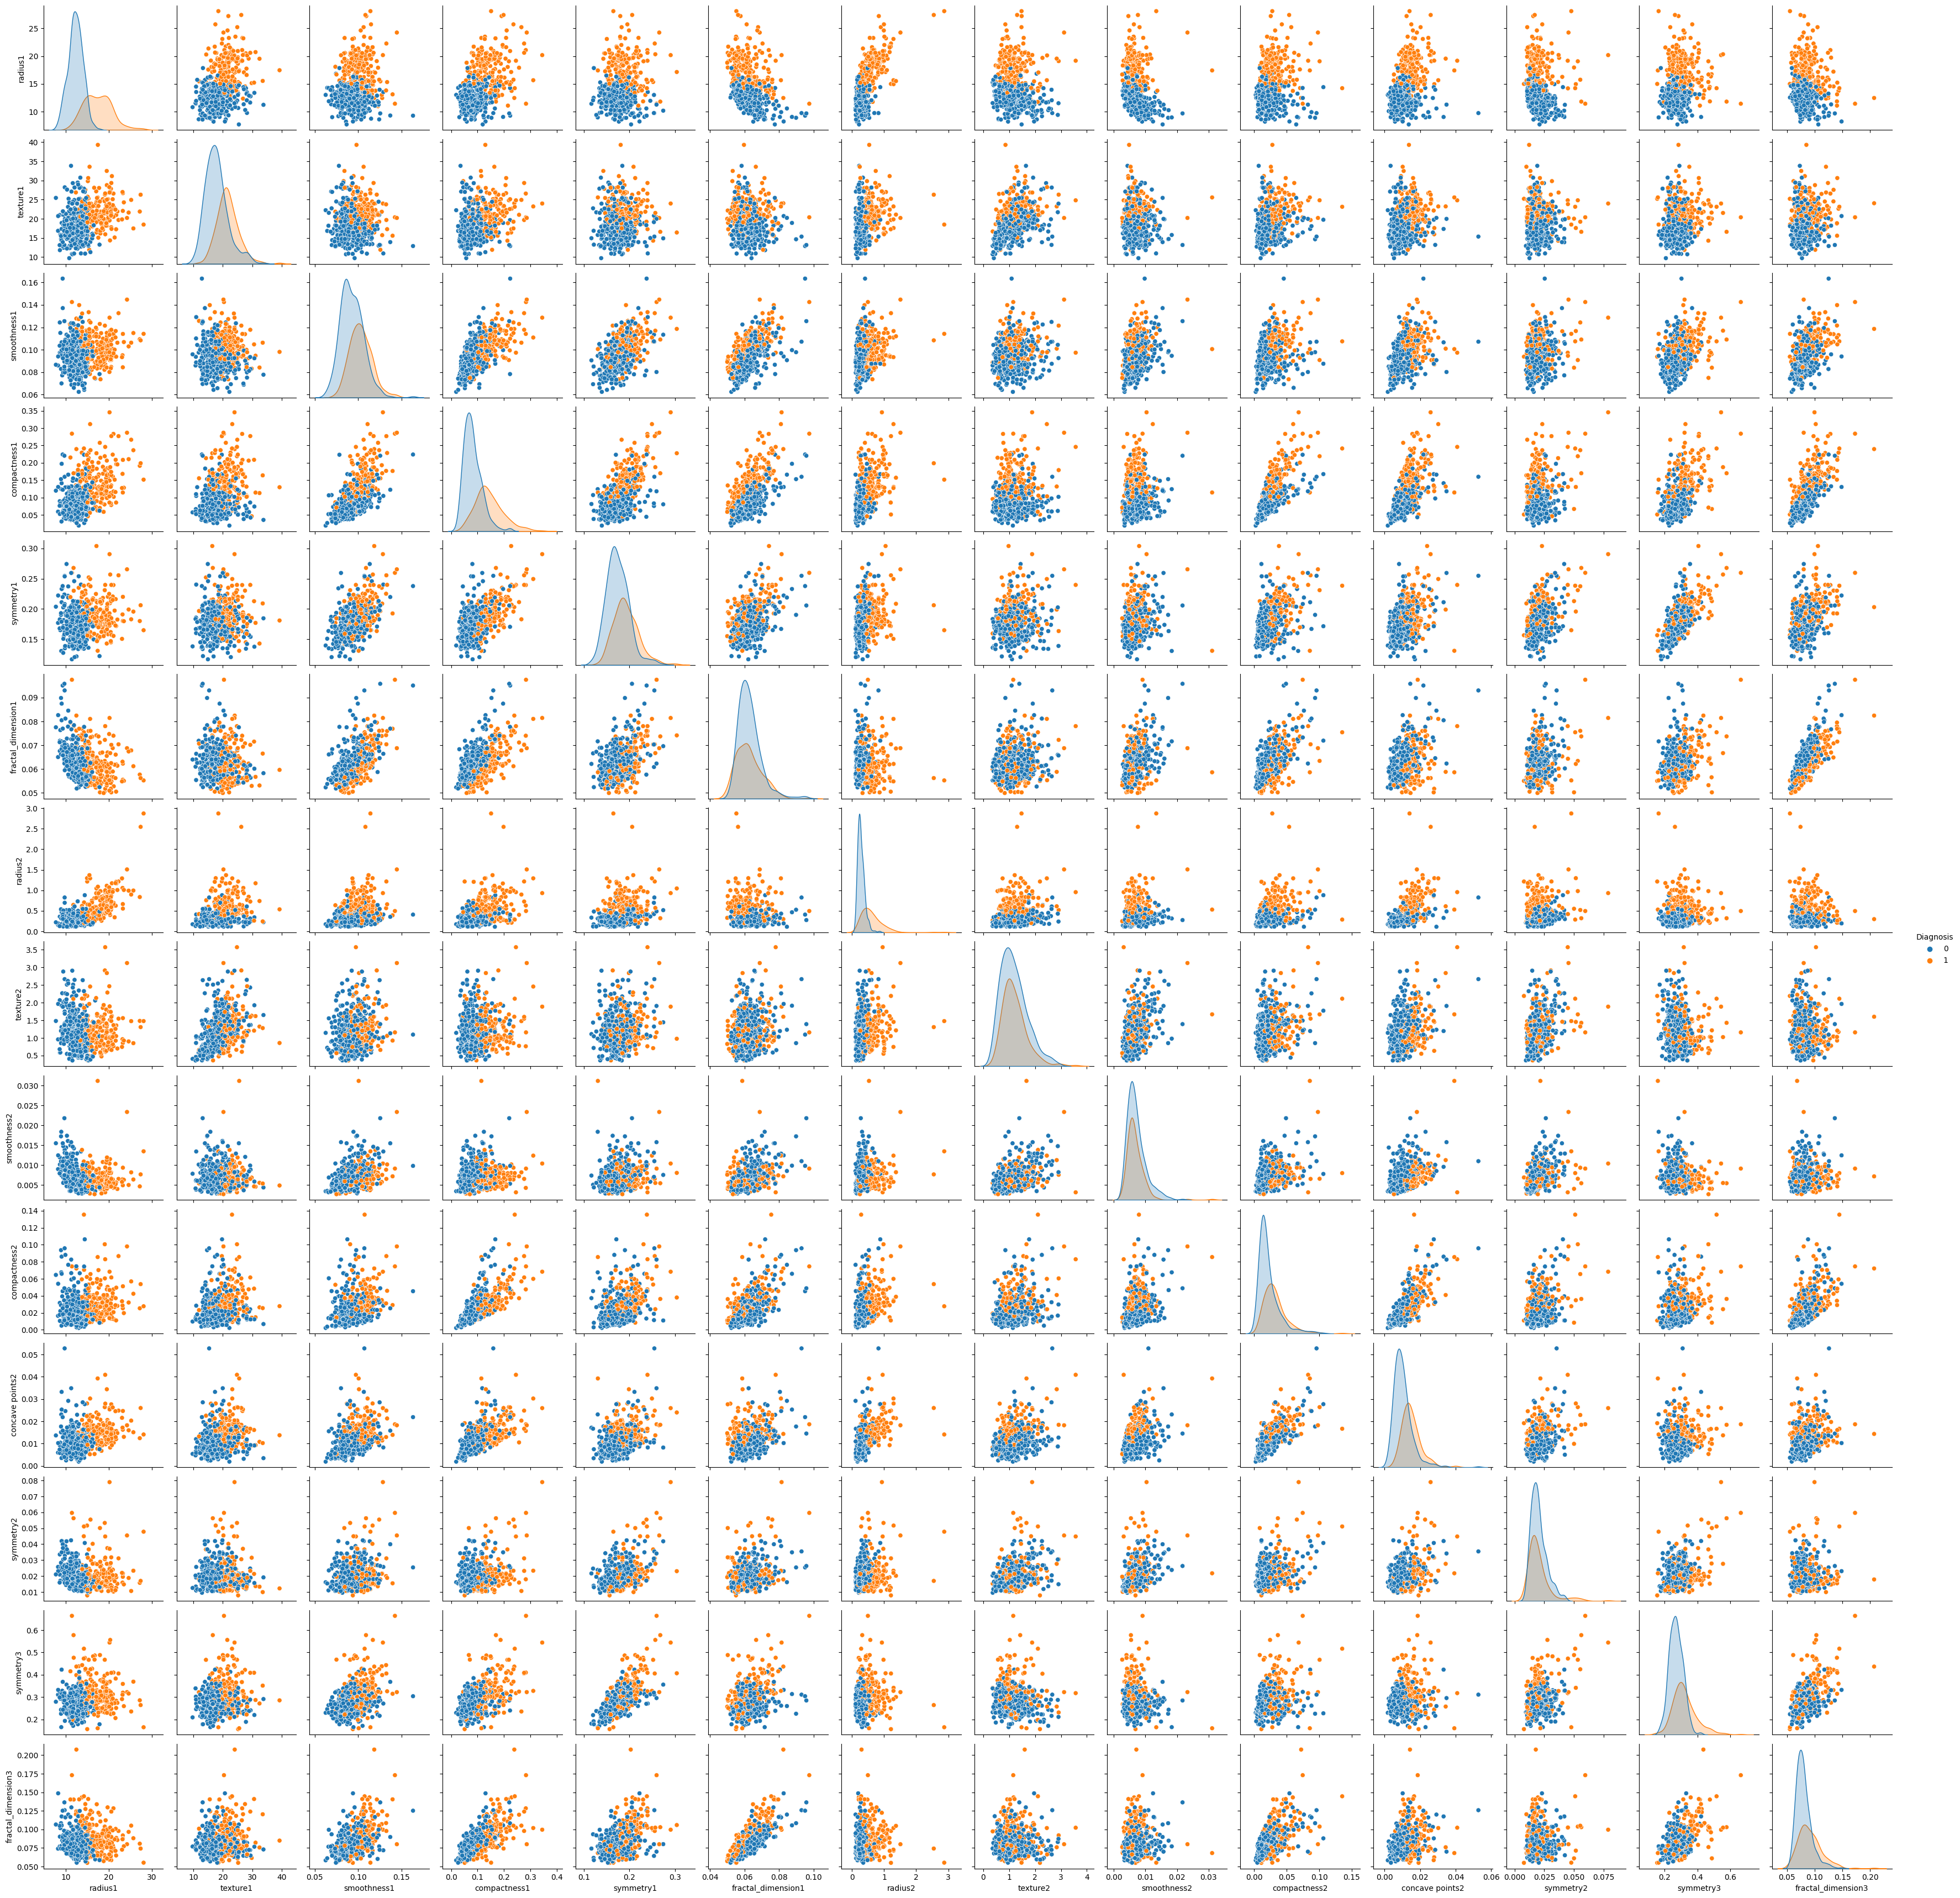

In [32]:
#  Creating a pairplot to visualize relationships between features based on diagnosis categories
# The 'hue' parameter color-codes the scatter plots by the 'Diagnosis' column
sns.pairplot(df_new, hue='Diagnosis', height=2.5)
plt.show()

##### In some of the plots, a clear separation between the two diagnosis categories is observable, which suggests that the selected features might have discriminative power. This observed separation could potentially justify the usage of a classification model, such as a Support Vector Machine (SVM), to accurately classify 'Malignant' and 'Benign' cases.

## 3) Supervised Machine Learning Modeling

The aim of training supervised machine learning models on the df dataset is to create models that can predict the diagnosis outcome based on the cell characteristics. This predictive capability can aid medical professionals in making informed decisions and potentially lead to more accurate and timely diagnoses.

### a- Importing necessary packages 

In [33]:
# this will split the data into training and testing sets
from sklearn.model_selection import train_test_split 
# this will make a logistic regression model for classificaiton
from sklearn.linear_model import LogisticRegression 
# this will create a classification report
from sklearn.metrics import classification_report 
# this creates a confusion matrix
from sklearn.metrics import confusion_matrix 
# this will scale the data
from sklearn import preprocessing  
# Importing the Support Vector Machine (SVM) classifier from the sklearn library
from sklearn.svm import SVC
# Importing the ConfusionMatrixDisplay class from sklearn.metrics be used to visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Importing the GridSearchCV module from the sklearn.model_selection library
from sklearn.model_selection import GridSearchCV

### b- Separating the target variable 'Diagnosis' (labels) from the features and Splitting the dataset into training and testing sets


In [34]:
y = df_new['Diagnosis']  # Labels indicating 'Malignant' or 'Benign' diagnosis

# Creating feature matrix X by dropping the 'Diagnosis' column
X = df.drop('Diagnosis', axis=1)  # Features containing cell characteristics

In [35]:
# Splitting the dataset into training and testing sets using train_test_split
# X_train and y_train will be used for training, while X_test and y_test will be used for evaluation
# The 'test_size' parameter determines the proportion of data used for testing (25% in this case)
# The 'random_state' parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### c- Using the Support Vector Machine model

As previously observed from the pairplots, certain scatter plots exhibit notable separation between the two diagnosis categories. This separation suggests that a classification method such as a Support Vector Machine (SVM) could be well-suited for this dataset. SVMs are effective in capturing complex relationships and decision boundaries, making them potentially capable of accurately predicting the diagnosis outcome based on the cell characteristics.

In [36]:
# Creating a StandardScaler object and fitting it to the training feature data (X_train)
scaler = preprocessing.StandardScaler().fit(X_train)

In [37]:
# Transforming the scaled feature values of the training set using the fitted scaler
X_train_scaled = scaler.transform(X_train)

# Transforming the scaled feature values of the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

In [38]:
# Counting the distribution of diagnosis categories in the test set labels (y_test)
y_test.value_counts()

Diagnosis
0    81
1    58
Name: count, dtype: int64

In [39]:
# Creating a Support Vector Machine (SVM) classifier instance with a fixed random state
clf_svm = SVC(random_state=42)

# Fitting the SVM classifier to the scaled training feature data and corresponding labels
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        81
           1       0.95      0.93      0.94        58

    accuracy                           0.95       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.95      0.95      0.95       139




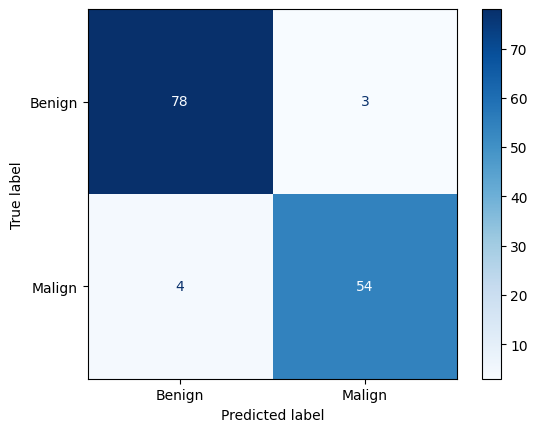

In [40]:
# Making predictions using the trained SVM classifier on the scaled test feature data
y_predict_svm = clf_svm.predict(X_test_scaled)

# Creating a ConfusionMatrixDisplay instance to visualize the confusion matrix
# The 'display_labels' parameter specifies the label names for better readability
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test, display_labels=["Benign", "Malign"], cmap='Blues')

# Printing a classification report to assess various performance metrics of the SVM model
print(classification_report(y_test, y_predict_svm))
print()

In a tumor diagnosis model, the concept of minimizing false negatives (FN) holds significant importance due to the critical implications it has in medical diagnosis and patient outcomes. False negatives occur when the model predicts a negative outcome (such as a benign tumor) for a sample that is actually positive (such as a malignant tumor). In the context of tumor diagnosis, a false negative could mean that a patient with a malignant tumor is incorrectly classified as having a benign tumor, leading to a delayed or missed diagnosis. For a model to be considerd the recall metric of the malignant tumor diagnosis should be 100%.

Hence, based on the analysis and evaluation conducted, it is apparent that the aforementioned model does not meet the criteria of a robust and reliable solution to retain.

The below code snippet sets up a parameter grid for performing hyperparameter tuning using cross-validation and the GridSearchCV method. The goal of this process is to find the best combination of hyperparameters for the Support Vector Machine (SVM) classifier.

In [41]:
#Optimize Parameters with Cross Validation and GridSearchCV()
param_grid = [
  {'C': [0.5, 1, 10, 100], # NOTE: Values for C must be > 0
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]


In [42]:
optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=20,
        scoring='accuracy', ## (accruacy is default scoring) Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='balanced_accuracy', ## Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='f1', ## Terrible!!! C=0.5, gamma=1
        ##scoring='f1_micro', ## Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='f1_macro', ## Same!! C=1, gamma='scale' (these are the same as default values)
        ##scoring='f1_weighted', ## Same!! C=1, gamma='scale' (these are the same as default values)
        ##scoring='roc_auc', ## Terrible!!! C=1, gamma=0.001
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [43]:
# Creating a new Support Vector Machine (SVM) classifier instance with the above optimized hyperparameters

clf_svm_new = SVC(random_state=42, C=10, gamma=0.01)

# Fitting the new SVM classifier to the scaled training feature data and corresponding labels
clf_svm_new.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01, random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        81
           1       0.98      0.93      0.96        58

    accuracy                           0.96       139
   macro avg       0.97      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139




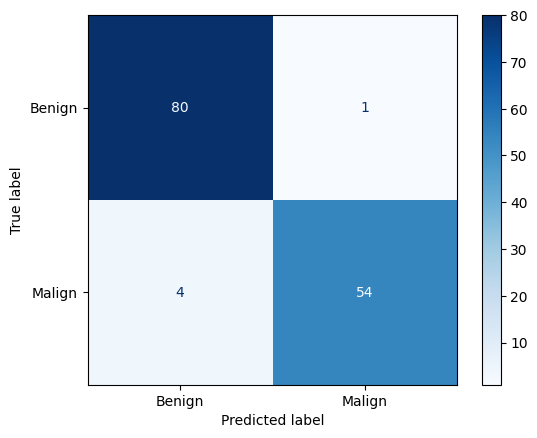

In [44]:
# Making predictions using the trained SVM classifier on the scaled test feature data
y_predict_svm_new = clf_svm_new.predict(X_test_scaled)

# Creating a ConfusionMatrixDisplay instance to visualize the confusion matrix
# The 'display_labels' parameter specifies the label names for better readability
ConfusionMatrixDisplay.from_estimator(clf_svm_new, X_test_scaled, y_test, display_labels=["Benign", "Malign"], cmap='Blues')

# Printing a classification report to assess various performance metrics of the SVM model

print(classification_report(y_test, y_predict_svm_new ))
print()

The hyperparameter optimization performed on the model using the given dataset resulted in enhanced detection accuracy for the 'Benign' diagnosis, achieving a precision of 98% in comparison to the initial model's precision of 95%. While this improvement is notable, it's important to note that the recall metric concerning the identification of 'Malignant' cases remained consistent at 93%. This observation suggests that the optimized model is particularly effective in correctly identifying 'Benign' cases, which is crucial for minimizing unnecessary concern for patients. However, further efforts might be warranted to bolster the model's ability to precisely identify 'Malignant' cases, ensuring accurate and timely diagnoses in both categories.

## d- Voting Classifier 

Employing the Voting Classifier method represents a strategic approach aimed at elevating the performance of a classification model while substantially reducing the incidence of false negatives, potentially to zero. This technique capitalizes on the collective wisdom of multiple individual classifiers, amalgamating their predictions to produce a final outcome. This amalgamation leverages the diverse strengths inherent in each constituent classifier.

For our specific use case of tumor diagnosis, where mitigating false negatives is of utmost importance, the choice of component classifiers is pivotal. In this scenario, we intend to include three distinct classifiers: Logistic Regression, Decision Tree Classifier, and K Nearest Neighbors Classifier.

In [45]:
# Importing models, including voting classifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier 

# set seed 
SEED = 1

In [46]:
# Instantiate individial classifier
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

# Define a list called classifiers that contain tuples (classifier name, classifier)
classifiers = [('Logistic Regression', lr),
                ('K Nearest Neighbors', knn),
               ('Decision Tree', dt)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.93      0.88      0.90        58

    accuracy                           0.92       139
   macro avg       0.92      0.91      0.92       139
weighted avg       0.92      0.92      0.92       139




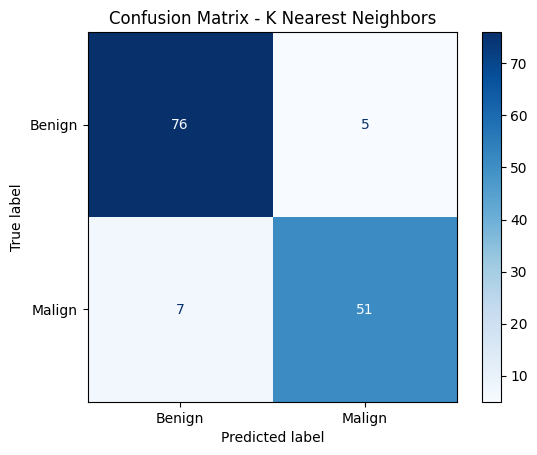


              precision    recall  f1-score   support

           0       0.92      0.94      0.93        81
           1       0.91      0.88      0.89        58

    accuracy                           0.91       139
   macro avg       0.91      0.91      0.91       139
weighted avg       0.91      0.91      0.91       139





              precision    recall  f1-score   support

           0       0.93      0.95      0.94        81
           1       0.93      0.90      0.91        58

    accuracy                           0.93       139
   macro avg       0.93      0.92      0.93       139
weighted avg       0.93      0.93      0.93       139




In [47]:
#Iterate over le list of classifiers
X_train_clf = np.array(X_train)
y_train_clf = np.array(y_train)
X_test_clf = np.array(X_test)
y_test_clf = np.array(y_test)



# Iterate over the list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train_clf, y_train_clf)

    # Predict the labels of the test set
    y_predict = clf.predict(X_test_clf)
    
    # Compute and print metrics
    ConfusionMatrixDisplay.from_estimator(clf, X_test_clf, y_test_clf, display_labels=["Benign", "Malign"], cmap='Blues')
    
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()
    print()
    # Print classification report 
    print(classification_report(y_test_clf, y_predict))
    print()

In [48]:
#Initiate a Vting Calssifier 'vc'
vc = VotingClassifier(estimators=classifiers)
#Fit 'vc' to training ser and predict test set labels 
vc.fit(X_train_clf, y_train_clf)
y_predict_vc = vc.predict(X_test_clf)

# Confusion Matrix 
ConfusionMatrixDisplay.from_estimator(clf, X_test_clf, y_test_clf, display_labels=["Benign", "Malign"], cmap='Blues')

plt.title(f'Confusion Matrix - Voting Classifier')
plt.show()
print()
# Print classification report 
print(classification_report(y_test_clf, y_predict_vc))
print()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.93      0.88      0.90        58

    accuracy                           0.92       139
   macro avg       0.92      0.91      0.92       139
weighted avg       0.92      0.92      0.92       139




According to the classification report, the voting model could be considered weaker than the VSM model. It's important to note that the recall metric concerning the identification of 'Malignant' cases dropped from 93% to 88%, and the precision decreased from 98% to 93%, along with the accuracy declining from 96% to 92%. 

## e- Logistic Regression

I will now explore various probability thresholds for the logistic regression model in order to attain two primary objectives: first, to eliminate any occurrences of false negative diagnosis classification, and second, to minimize the incidence of false positive cases. Additionally, I aim to achieve a recall metric of 100%, ensuring the accurate identification of all 'Malignant' cases. Alongside this, I endeavor to maximize the precision metric related to the correct identification of 'Malignant' cases. This iterative experimentation with probability thresholds intends to strike a balance between these objectives while carefully considering the intricate trade-offs between recall, precision, and the model's overall performance.
The threshold will be systematically varied across a range of probabilities, spanning from 0.01 to 0.50.

#### Scatter plot

The plot generated using the provided code illustrates the relationship between the probability threshold and the counts of both False Negatives (FN) and False Positives (FP) as the threshold is varied. Here's a description of the plot:

The x-axis of the plot represents the probability threshold, which ranges from 0.01 to 0.5 in increments of 0.01. This threshold determines the point at which the model classifies an instance as 'Positive' (e.g., 'Malignant').

The y-axis represents the count of False Negatives (FN) and False Positives (FP) for each corresponding threshold value. False Negatives are instances where the model predicts 'Negative' (e.g., 'Benign'), but the true label is 'Positive' ('Malignant'). False Positives are instances where the model predicts 'Positive' but the true label is 'Negative'.

Two lines are plotted on the graph:

The line labeled "False Negative (FN)" shows how the count of False Negatives changes with different probability thresholds. This line represents the trade-off between correctly identifying all 'Malignant' cases (recall) and minimizing the count of False Negatives.
The line labeled "False Positive (FP)" demonstrates how the count of False Positives varies as the probability threshold is adjusted. This line illustrates the balance between maximizing precision for 'Malignant' cases and reducing the count of False Positives.
The plot provides insights into how adjusting the probability threshold impacts the model's ability to correctly classify instances and manage false negatives and false positives. It helps visualize the trade-offs between these metrics and guides the selection of an optimal threshold that aligns with the desired balance between minimizing false negatives, reducing false positives, achieving high recall, and maximizing precision.

In [49]:
X_train_LR = X_train
y_train_LR = y_train
X_test_LR = X_test
y_test_LR = y_test

# Instantiate the logistic regression classifier
#List of probabilities
Prob_list = np.arange(0.01, 0.51 , 0.01)

# Fit the classifier to the training set
lr.fit(X_train_LR, y_train_LR)

# Predict the probability estimates for the test set
y_probabilities = lr.predict_proba(X_test_LR)

#initiating the list of potential False negative
FN = []
#initiating the list of potential False positive
FP = []
# Set the new probability threshold (e.g., 0.7)
for i in Prob_list:
    # Change the class predictions based on the new threshold
    y_predict_new_threshold = (y_probabilities[:, 1] >= i).astype(int)

    # Compute confusion matrix and classification report using the new threshold
    cm = confusion_matrix(y_test_LR, y_predict_new_threshold)
    FN.append(cm[1][0])
    FP.append(cm[0][1])
    

# Plotting the results using seaborn line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=Prob_list, y=FN, label="False Negative (FN)")
sns.lineplot(x=Prob_list, y=FP, label="False Positive (FP)")
plt.xlabel("Probability Threshold")
plt.ylabel("Count")
plt.title("FN and FP vs. Probability Threshold")
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Based on the depicted graph, the probability threshold that achieves the dual objectives of eradicating any instances of false negative diagnosis classification while concurrently minimizing the occurrence of false positive cases is determined to be 0.09.

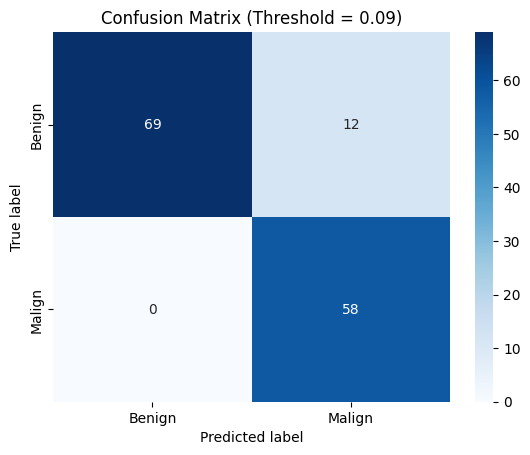

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        81
           1       0.83      1.00      0.91        58

    accuracy                           0.91       139
   macro avg       0.91      0.93      0.91       139
weighted avg       0.93      0.91      0.91       139



In [50]:
y_predict_new_threshold = (y_probabilities[:, 1] >= 0.09).astype(int)
cm = confusion_matrix(y_test_LR, y_predict_new_threshold)
# Display the confusion matrix with better formatting
confusion_df = pd.DataFrame(cm, index=["Benign", "Malign"], columns=["Benign", "Malign"])
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title(f"Confusion Matrix (Threshold = 0.09)")
plt.show()
print(classification_report(y_test_LR, y_predict_new_threshold))

This model demonstrates considerable strength, evident by its impressive performance metrics. With a recall metric of 100%, precision at 83%, and an overall accuracy of 91%, it showcases a robust capability to accurately identify 'Malignant' cases, reflecting a well-balanced blend of precision and sensitivity.

## 4) Conclusion

In conclusion, the final model utilizing logistic regression with a probability threshold of 0.09 emerges as the optimal choice among the alternatives, namely VSM and Voting models. This model's remarkable achievement of a 100% recall metric in diagnosing 'Malignant' tumors, coupled with the successful maximization of its precision, firmly establishes its superiority. By expertly balancing the ability to identify all 'Malignant' cases and effectively reducing false positives, this model demonstrates its robustness in tackling the specific challenge of tumor diagnosis.